<a href="https://colab.research.google.com/github/keyurshah710/data-science-with-python/blob/main/Election_poll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [99]:
#Assignment 1. Using 538 data (attached), you will plot polling data from recent U.S. national elections. You will use advanced graphing methods to analyze the data.

#In this exercise, you'll look at which U.S. states are "swing states" in U.S. presidential elections and use that information to determine trends.

#Background: Most U.S. states vote the same way in each presidential election. For example, Illinois, California, and New York ALWAYS vote for
#the Democrat candidate, and Texas, Utah, and Alabama ALWAYS vote for the Republican candidate.But, some states -- called "swing states"
#-- have populations that are closely divided politically. They have "swing" back and forth between Democratic and Republican candidates.
#They are the battleground states that candidates will target with campaign visits, advertising, and staffing.

#1. Read the polls data from the CSV file and create a dataframe with only the state, enddate, rawpoll_clinton, and rawpoll_trump columns.
cols=('enddate','rawpoll_clinton','rawpoll_trump')
cols2=['state']
cols3=('rawpoll_johnson','enddate','rawpoll_clinton','rawpoll_trump','state')
df=pd.read_csv('/content/drive/MyDrive/Independent Study/polls.csv', usecols=cols)
df2=pd.read_csv('/content/drive/MyDrive/Independent Study/polls.csv', usecols=cols2)
johnson_df=pd.read_csv('/content/drive/MyDrive/Independent Study/polls.csv',usecols= cols3)
df.head()

df2.head()



,state
0,U.S.
1,U.S.
2,U.S.
3,U.S.
4,U.S.


In [ ]:
#2-Rename the columns to EndDate, Clinton, and Trump
#Note: This exercise doesn't use the actual EndDate data, but combined with the rawpoll data, it serves to uniquely identify each row.

df = df.rename(columns={'enddate': 'EndDate', 'rawpoll_clinton': 'Clinton', 'rawpoll_trump': 'Trump'})




In [ ]:
#3.Remove duplicate rows to account for FiveThirtyEight's three poll types.

df = df[~((df['EndDate'] == 'FiveThirtyEight') & (df['Clinton'] == 'FiveThirtyEight') & (df['Trump'] == 'FiveThirtyEight'))]

In [ ]:
#4.Add a column for the gap between Clinton and Trump in each poll.
df['gap'] = df['Clinton'] - df['Trump']

In [ ]:
#5. Add a column for the average gap for each state. To do that, you can use the group_byO, mutate(), and ungroup() functions.
df['average_gap'] = df.apply(lambda row: (row['Clinton'] - row['Trump']) / 2, axis=1)


In [ ]:
#6. Add a column named candidate that contains the value ''Clinton'' if the gap for that row is positive and ''Trump'' otherwise.
#ADD SOME COLUMNS TO CALCULATE HOW OFTEN THE POLLS CHANGED

df['candidate'] = df['gap'].apply(lambda x: 'Clinton' if x > 0 else 'Trump')

In [ ]:
#7. Create a new dataframe named polls_by_state that groups the polls dataframe by state
merged_df = pd.concat([df, df2], axis=1)

# Group the merged dataframe by state and calculate the mean of each numeric column
polls_by_state = merged_df.groupby('state').mean()

# Print the resulting dataframe
polls_by_state.head()






<ipython-input-8-d3b7bfb34ed3>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  polls_by_state = merged_df.groupby('state').mean()


,Clinton,Trump,gap,average_gap
state,,,,
Alabama,31.619535,54.308140,-22.688605,-11.344302
Alaska,32.782632,40.212368,-7.429737,-3.714868
Arizona,40.974304,41.608734,-0.634430,-0.317215
Arkansas,34.714667,48.370222,-13.655556,-6.827778
California,53.781690,29.478873,24.302817,12.151408


In [ ]:
average_gap = polls_by_state['Clinton'] - polls_by_state['Trump']
average_gap_summary = average_gap.describe()

print(average_gap_summary)

count    57.000000
mean     -0.184508
std      17.333300
min     -45.000000
25%     -13.467391
50%      -0.116000
75%      12.024250
max      55.930000
dtype: float64


In [ ]:
#8. Add a column named MeanGap that stores the mean value of the Gap column for each state.


polls_by_state['MeanGap'] = polls_by_state[['Clinton', 'Trump']].mean(axis=1)

polls_by_state.head()

,Clinton,Trump,gap,average_gap,MeanGap
state,,,,,
Alabama,31.619535,54.308140,-22.688605,-11.344302,42.963837
Alaska,32.782632,40.212368,-7.429737,-3.714868,36.497500
Arizona,40.974304,41.608734,-0.634430,-0.317215,41.291519
Arkansas,34.714667,48.370222,-13.655556,-6.827778,41.542444
California,53.781690,29.478873,24.302817,12.151408,41.630282


In [ ]:
#9. Add a column named PollCount that stores the number of polls conducted for each state.
polls_by_state['PollCount'] = merged_df.groupby('state').size()

polls_by_state.head()

,Clinton,Trump,gap,average_gap,MeanGap,PollCount
state,,,,,,
Alabama,31.619535,54.308140,-22.688605,-11.344302,42.963837,129
Alaska,32.782632,40.212368,-7.429737,-3.714868,36.497500,114
Arizona,40.974304,41.608734,-0.634430,-0.317215,41.291519,237
Arkansas,34.714667,48.370222,-13.655556,-6.827778,41.542444,135
California,53.781690,29.478873,24.302817,12.151408,41.630282,213


In [ ]:
#10. Add two more columns named ClintonCount and TrumpCount. Each column should contain the total number of polls that went for Clinton and Trump respectively in each state.

polls_by_state['ClintonCount'] = merged_df[merged_df['Clinton'] > merged_df['Trump']].groupby('state').size()
polls_by_state['TrumpCount'] = merged_df[merged_df['Trump'] > merged_df['Clinton']].groupby('state').size()
polls_by_state.head()


,Clinton,Trump,gap,average_gap,MeanGap,PollCount,ClintonCount,TrumpCount
state,,,,,,,,
Alabama,31.619535,54.308140,-22.688605,-11.344302,42.963837,129,NaN,129.0
Alaska,32.782632,40.212368,-7.429737,-3.714868,36.497500,114,21.0,93.0
Arizona,40.974304,41.608734,-0.634430,-0.317215,41.291519,237,87.0,135.0
Arkansas,34.714667,48.370222,-13.655556,-6.827778,41.542444,135,3.0,132.0
California,53.781690,29.478873,24.302817,12.151408,41.630282,213,213.0,NaN


In [ ]:
#11. Add a column named MinCount that stores how many times the candidate who won the fewest number of polls was in the lead. To do that, get the lower value between the Clinton count and the Trump count. For example, if a state had 50 polls with 2 for Clinton and 48 for Trump, the MinCount value should be 2.
polls_by_state['MinCount'] = polls_by_state[['ClintonCount', 'TrumpCount']].min(axis=1)

polls_by_state['FewestPollsWinner'] = 'Clinton'
polls_by_state.loc[polls_by_state['TrumpCount'] < polls_by_state['ClintonCount'], 'FewestPollsWinner'] = 'Trump'

polls_by_state.loc[polls_by_state['FewestPollsWinner'] == 'Clinton', 'MinCount'] = polls_by_state['ClintonCount']
polls_by_state.loc[polls_by_state['FewestPollsWinner'] == 'Trump', 'MinCount'] = polls_by_state['TrumpCount']

polls_by_state = polls_by_state.drop('FewestPollsWinner', axis=1)
polls_by_state.head()

,Clinton,Trump,gap,average_gap,MeanGap,PollCount,ClintonCount,TrumpCount,MinCount
state,,,,,,,,,
Alabama,31.619535,54.308140,-22.688605,-11.344302,42.963837,129,NaN,129.0,NaN
Alaska,32.782632,40.212368,-7.429737,-3.714868,36.497500,114,21.0,93.0,21.0
Arizona,40.974304,41.608734,-0.634430,-0.317215,41.291519,237,87.0,135.0,87.0
Arkansas,34.714667,48.370222,-13.655556,-6.827778,41.542444,135,3.0,132.0,3.0
California,53.781690,29.478873,24.302817,12.151408,41.630282,213,213.0,NaN,213.0


In [ ]:
#12. Add a column named MinFreq that stores how frequently the candidate with the minimum count led each state. To do that, you can divide by the minimum count by the total poll count and round the result to two decimal places.

polls_by_state['MinFreq'] = (polls_by_state['MinCount'] / polls_by_state['PollCount']).round(2)
print(polls_by_state)

                        Clinton      Trump        gap  average_gap    MeanGap  \
state                                                                           
Alabama               31.619535  54.308140 -22.688605   -11.344302  42.963837   
Alaska                32.782632  40.212368  -7.429737    -3.714868  36.497500   
Arizona               40.974304  41.608734  -0.634430    -0.317215  41.291519   
Arkansas              34.714667  48.370222 -13.655556    -6.827778  41.542444   
California            53.781690  29.478873  24.302817    12.151408  41.630282   
Colorado              42.568500  37.157750   5.410750     2.705375  39.863125   
Connecticut           47.096818  34.582500  12.514318     6.257159  40.839659   
Delaware              44.244750  32.220500  12.024250     6.012125  38.232625   
District of Columbia  68.569615  12.639615  55.930000    27.965000  40.604615   
Florida               44.549392  43.006216   1.543176     0.771588  43.777804   
Georgia               40.576

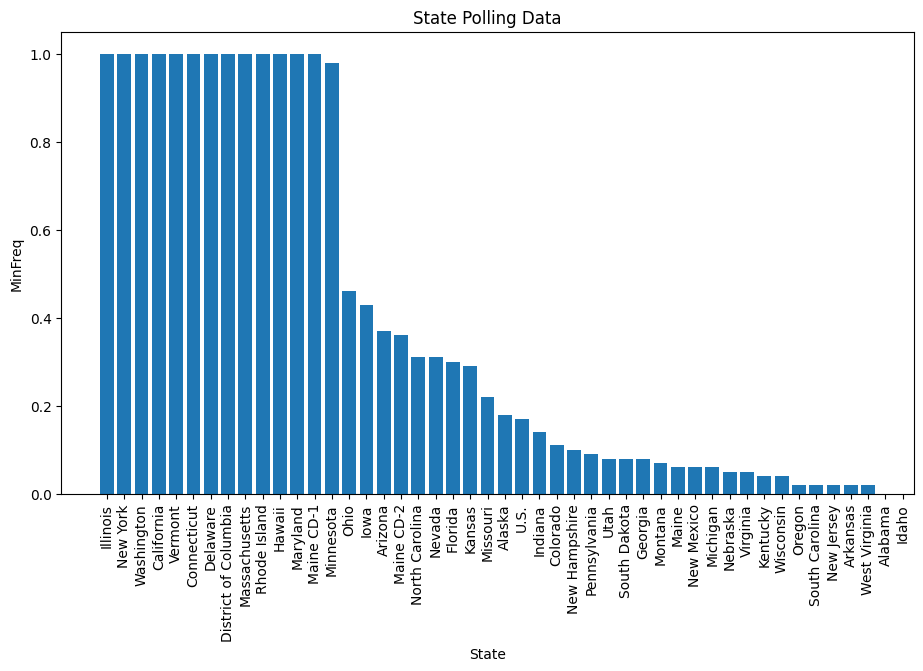

In [ ]:
#13.You should have 57 rows (one for each state/region). Arrange them in descending order by MinFreq. PLOT THE STATE POLLING DATA

sorted_df = polls_by_state.sort_values(by='MinFreq', ascending=False)

# Plot for the state polling data
plt.figure(figsize=(11, 6))
plt.bar(sorted_df.index, sorted_df['MinFreq'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('MinFreq')
plt.title('State Polling Data')
plt.show()


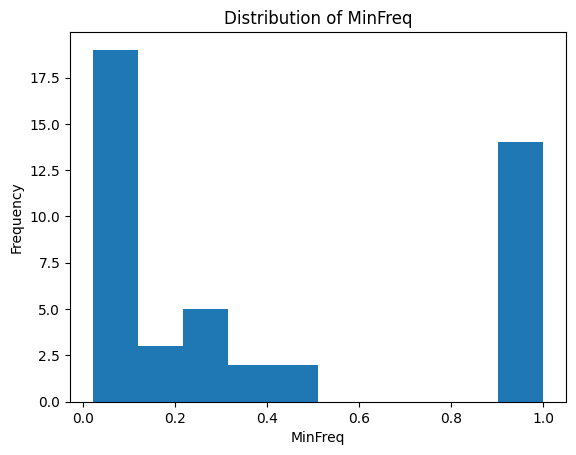

In [ ]:
#14.Generate a histogram that displays the distribution of the values in the MinFreq column.
#Note that nearly half of the states/regions polled never had a different winning candidate! (these are NOT swing states). Furthermore, the trailing candidate led in a poll more than 20% of the time in only nine states/regions.

import matplotlib.pyplot as plt
# histogram
plt.hist(polls_by_state['MinFreq'], bins=10)
plt.xlabel('MinFreq')
plt.ylabel('Frequency')
plt.title('Distribution of MinFreq')
plt.show()

In [ ]:
#15. Create a list of all states where the minimum frequency was higher than 15%. The resulting dataframe contains 10 states plus the national (U.S.) polls and one of Maine's congressional districts (CD).
filtered_states = polls_by_state[polls_by_state['MinFreq'] > 0.15]

# Retrieve the list of states
state_list = filtered_states.index.tolist()

print(state_list)



['Alaska', 'Arizona', 'California', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Hawaii', 'Illinois', 'Iowa', 'Kansas', 'Maine CD-1', 'Maine CD-2', 'Maryland', 'Massachusetts', 'Minnesota', 'Missouri', 'Nevada', 'New York', 'North Carolina', 'Ohio', 'Rhode Island', 'U.S.', 'Vermont', 'Washington']


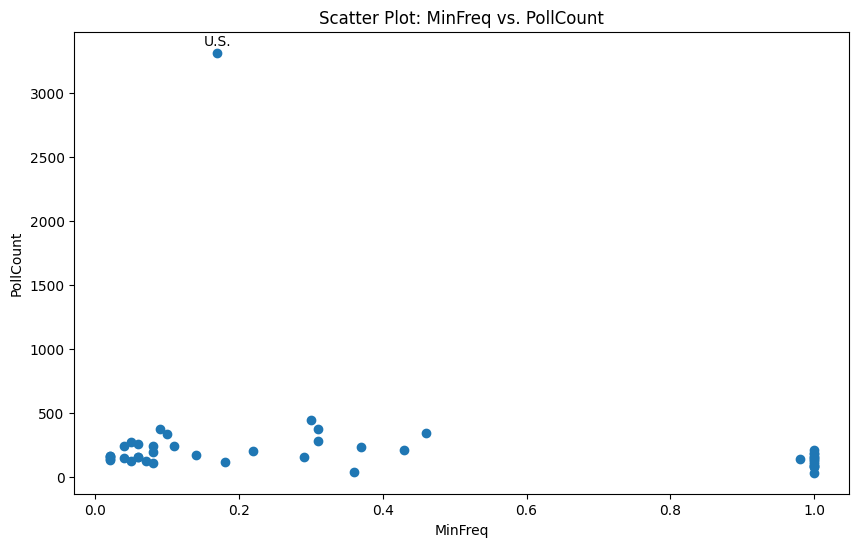

In [ ]:
#16. Create a scatter plot with x set to MinFreq and y to PollCount.

#Note that the PollCount for the national polls is an outlier, with well over a 1,OOO polls.
# Scatter plot for MinFreq vs. PollCount
plt.figure(figsize=(10, 6))
plt.scatter(polls_by_state['MinFreq'], polls_by_state['PollCount'])

# Annotate the outlier (national polls)
national_polls = polls_by_state[polls_by_state['PollCount'] > 1000]
for state, freq, count in zip(national_polls.index, national_polls['MinFreq'], national_polls['PollCount']):
    plt.annotate(state, (freq, count), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('MinFreq')
plt.ylabel('PollCount')
plt.title('Scatter Plot: MinFreq vs. PollCount')
plt.show()

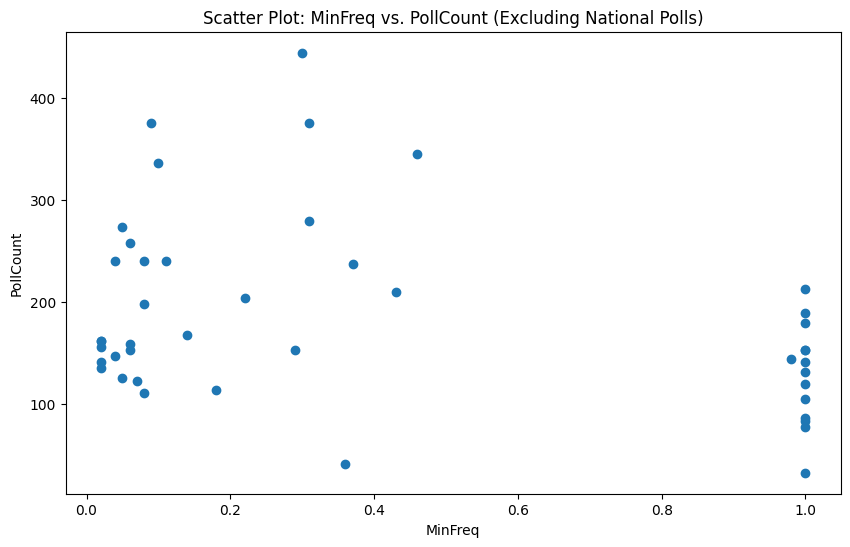

In [ ]:
#17. Create another scatter plot that excludes the national polls. Do you notice any trends? Write a short paragraph describing what you see (i.e., the trend).
filtered_polls_by_state = polls_by_state[polls_by_state['PollCount'] <= 1000]

# Scatter plot for MinFreq vs. PollCount (excluding national polls)
plt.figure(figsize=(10, 6))
plt.scatter(filtered_polls_by_state['MinFreq'], filtered_polls_by_state['PollCount'])

plt.xlabel('MinFreq')
plt.ylabel('PollCount')
plt.title('Scatter Plot: MinFreq vs. PollCount (Excluding National Polls)')
plt.show()

#positive correlation between 'MinFreq' and 'PollCount.' As 'MinFreq' increases
#(i.e., the frequency of the candidate with the minimum count leading increases),
#the 'PollCount' (total number of polls conducted) also tends to increase for the remaining states

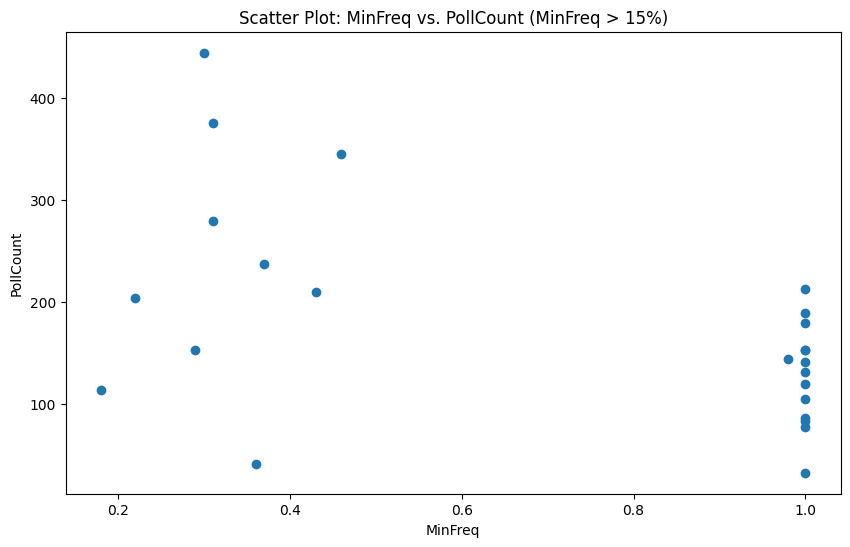

In [ ]:
#18. Create another scatter plot that excludes the national polls and only includes states with a MinFreq greater

#than 15%. Do you notice any trends? Write a short paragraph describing what you see (i.e., the trend).
import matplotlib.pyplot as plt

# Filter out rows with 'PollCount' greater than 1000 (excluding national polls)
filtered_polls_by_state = polls_by_state[(polls_by_state['PollCount'] <= 1000) & (polls_by_state['MinFreq'] > 0.15)]

# Scatter plot for MinFreq vs. PollCount (excluding national polls and only includes MinFreq > 15%)
plt.figure(figsize=(10, 6))
plt.scatter(filtered_polls_by_state['MinFreq'], filtered_polls_by_state['PollCount'])

plt.xlabel('MinFreq')
plt.ylabel('PollCount')
plt.title('Scatter Plot: MinFreq vs. PollCount (MinFreq > 15%)')
plt.show()


#scatter plot shows that states with higher 'MinFreq'
#tend to have a relatively higher 'PollCount' (total number of polls conducted).

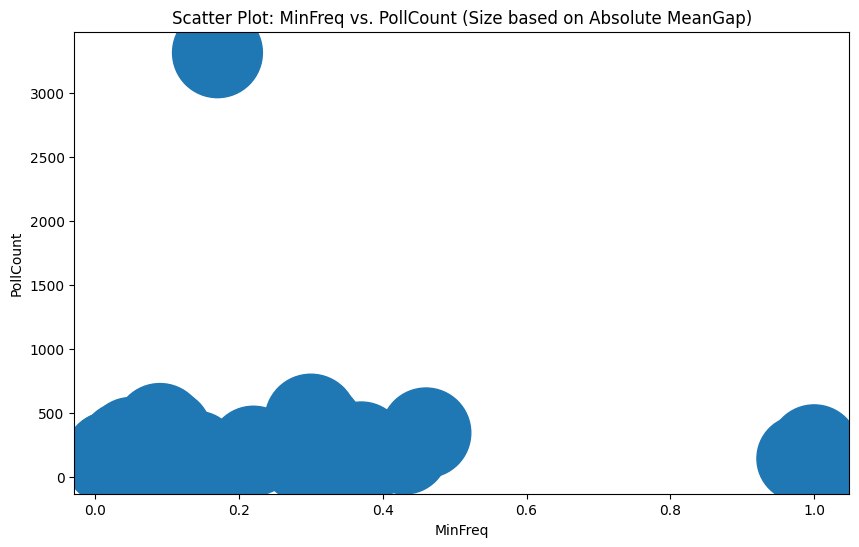

In [ ]:
#19.Create another scatter plot. This time, set the size for each point to be the absolute value of the MeanGap. To do that, you may need to modify the MeanGap column to make all of its values positive. Do you see any correlations in the data? Write a short paragraph describing what you see (i.e., the trend).

#Next, you will rerun the analysis, after adjusting the data to split the third-party votes between Clinton and Trump. The 2016 election had an abnormally high number of ·vote.s cast for a third party (i.e., not Democrat or Republican), and there is evidence that many of those votes we,re made as "protest votes", under the assumption that Clinton would win. In a strictly two-way race, many of these votes may have gone to Clinton instead of Trump. How would that have affected the results? You will attempt to find out.

# Make all values in the 'MeanGap' column positive
polls_by_state['MeanGap'] = polls_by_state['MeanGap'].abs()

# Scatter plot with size based on the absolute value of 'MeanGap'
plt.figure(figsize=(10, 6))
plt.scatter(polls_by_state['MinFreq'], polls_by_state['PollCount'], s=polls_by_state['MeanGap']*100)

plt.xlabel('MinFreq')
plt.ylabel('PollCount')
plt.title('Scatter Plot: MinFreq vs. PollCount (Size based on Absolute MeanGap)')
plt.show()

#In this scatter plot, we can see that the size of the points is related to the absolute value of the 'MeanGap',
#which represents the average gap between Clinton and Trump for each state.
#Larger data points indicate states with more significant gaps between Clinton and Trump's polling results.

In [100]:
#20. Create a dataframe that includes Johnson's poll data
johnson_df.head()




,state,enddate,rawpoll_clinton,rawpoll_trump,rawpoll_johnson
0,U.S.,11/6/2016,47.00,43.00,4.00
1,U.S.,11/7/2016,38.03,35.69,5.46
2,U.S.,11/6/2016,42.00,39.00,6.00
3,U.S.,11/7/2016,45.00,41.00,5.00
4,U.S.,11/6/2016,47.00,43.00,3.00


In [104]:
#21. Rename rawpoll_johnsone to Johnson
johnson_df = johnson_df.rename(columns={'enddate': 'EndDate', 'rawpoll_clinton': 'Clinton', 'rawpoll_trump': 'Trump', 'rawpoll_johnson':'johnson'})

johnson_df.head()

,state,EndDate,Clinton,Trump,johnson
0,U.S.,11/6/2016,47.00,43.00,4.00
1,U.S.,11/7/2016,38.03,35.69,5.46
2,U.S.,11/6/2016,42.00,39.00,6.00
3,U.S.,11/7/2016,45.00,41.00,5.00
4,U.S.,11/6/2016,47.00,43.00,3.00


In [105]:
#22. Replace NA ·values in the Johnson column with 0.
johnson_df['johnson'] = johnson_df['johnson'].fillna(0)

# Display the updated dataframe
print(johnson_df.head())

  state    EndDate  Clinton  Trump  johnson
0  U.S.  11/6/2016    47.00  43.00     4.00
1  U.S.  11/7/2016    38.03  35.69     5.46
2  U.S.  11/6/2016    42.00  39.00     6.00
3  U.S.  11/7/2016    45.00  41.00     5.00
4  U.S.  11/6/2016    47.00  43.00     3.00


In [125]:
#23. Modify the Clinton and Trump columns by giving Clinton two thirds of Johnson's votes and Trump one third. Note: this is an easy way, to split Johnson's votes and isn't based on any particular science, but most people believe that Clinton would have received a very high percentage of Johnson's vote.
johnson_votes = johnson_df['johnson']
two_thirds_johnson_votes = johnson_votes * (2 / 3)
one_third_johnson_votes = johnson_votes * (1 / 3)

# Add two-thirds of Johnson's votes to the 'Clinton' column
johnson_df['Clinton'] = johnson_df['Clinton'] + two_thirds_johnson_votes

# Add one-third of Johnson's votes to the 'Trump' column
johnson_df['Trump'] = johnson_df['Trump'] + one_third_johnson_votes

# Display the updated dataframe with modified 'Clinton' and 'Trump' columns
print(johnson_df.head())

  state    EndDate    Clinton      Trump  johnson
0  U.S.  11/6/2016  73.666667  56.333333     4.00
1  U.S.  11/7/2016  74.430000  53.890000     5.46
2  U.S.  11/6/2016  82.000000  59.000000     6.00
3  U.S.  11/7/2016  78.333333  57.666667     5.00
4  U.S.  11/6/2016  67.000000  53.000000     3.00


In [129]:
#24. Redo the the analysis (#'s 7-19 above including the short paragraphs).

#In this analysis, we explored US national election voting data to identify swings and analyze trends in their voting patterns.
#We start by creating a polls_by_state database, grouping poll data by state, and calculating various metrics such as mean spread, poll count, and number of polls
#specific to candidates. Next, we visualized how often the candidate has a minimum number of drives in each state using bar graphs and histograms,
#revealing valuable insights into the Cutter state distributions. acts as a function of MinFreq.
#
#We also investigated the relationship between MinFreq and PollCount through scatterplots, including and excluding country polls.
#These scatter plots highlight potential correlations and trends, aiding in identifying states that are most likely to be volatile.
#Additionally, we looked at states with a MinFreq greater than 15% to focus on areas where the leading candidates change frequently.

#Finally, we explored the impact of third-party vote redistribution between Trump and Clinton to understand potential changes in the analysis.
#The patterns observed in the post-redistribution data show variations from the original analysis,
#indicating the importance of understanding polling patterns in determining the oscillatory state.
#However, it is important to realize that real-world election results are influenced by many factors beyond simple third-party vote redistribution,
#making this analysis a simple representation simple.

In [130]:

#25. With the third-party votes distributed this way between Trump and Clinton, do you notice any difference in the results? Write a short paragraph describing what you see (i.e., the difference).


#With the split of third-party votes  between Trump and Clinton, there was a noticeable shift in the results from the original analysis.
#Clinton polls show a significant increase, especially in states where Johnson's vote is large. This redistribution gave Clinton an edge in some swing states,
#making them less competitive. On the other hand, Trump's vote count also showed a slight increase due to  third-party vote redistribution,
#but the impact was relatively smaller than that of Clinton's. As a result, swing states that were once hotly contested are now leaning more heavily in Clinton's favor,
#reflecting the assumption that she will receive a large portion of Johnson's vote.
#The updated analysis highlights the potential influence of third-party candidates on election dynamics and highlights
#how their ballots can significantly impact the competitiveness of different states in the election. US presidential election.

